In [12]:
###This snippet explains how a LogReg fails when you don't have a linear classification problem.  
###There are three blobs, each with a different classification.
###Fitting to blobs 0 or 2 (idx=0, idx=2) is linearly solvable. The plots show the decision boundary.
###Fitting to the middle blob has equal negative classes either side of it, 
###So it never finds a good decision boundary. It settles on giving _all_ points a 1/3 chance of 
###Being in the positive class, which is just their proportion. 
####btw.... the actual decision boundary for the middle blob is out of frame. Unset the ylim and xlim
####to see it. 

from sklearn import datasets
from sklearn.metrics import log_loss
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

n_samples = 50000

centers = [(-5, -5), (0, 0), (5, 5)]
X, y = datasets.make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                           centers=centers, shuffle=False, random_state=42)
bah = MultiLabelBinarizer().fit_transform([str(i) for i in y])


def fitBlobs(idx):
    cals = list()
    plt.figure()
    #kf = KFold(n_splits = 10, shuffle=True)
    kf = StratifiedKFold(n_splits = 5, shuffle=True)
    for train_index, test_index in kf.split(X, bah[:,idx]):
        X_train, X_test = X[np.array(train_index)], X[np.array(test_index)]
        y_train1, y_test1 = bah[:,idx][np.array(train_index)], bah[:,idx][np.array(test_index)]
        print('.', end='')
        clf = LogisticRegression(solver='liblinear')
        clf.fit(X_train, y_train1)
        proba = clf.predict_proba(X_test)[:,1]
        cal = calibration_curve(y_test1, proba, n_bins=10)
        points_x=[x for x in range(-10,+10)]

        line_bias = clf.intercept_
        line_w = clf.coef_.T
        points_y=[(line_w[0]*x+line_bias)/(-1*line_w[1]) for x in points_x]
        plt.plot(points_x, points_y)
        print('Log Loss for group', idx, 'is', log_loss(y_test1, proba))

    plt.scatter(X_test[:,0], X_test[:,1])
    #plt.ylim(-10,10)
    #plt.xlim(-10,10)

.Log Loss for group 0 is 0.0012541437092384255
.Log Loss for group 0 is 0.001442136716601609
.Log Loss for group 0 is 0.0012125318553282548
.Log Loss for group 0 is 0.001418531548796225
.Log Loss for group 0 is 0.0011189913166267595


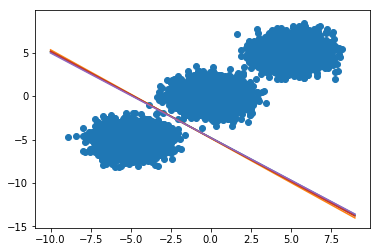

In [13]:
fitBlobs(0)
##Good log loss and good fit. 

.Log Loss for group 1 is 0.6365536633064038
.Log Loss for group 1 is 0.636551232924005
.Log Loss for group 1 is 0.6365343518136943
.Log Loss for group 1 is 0.6365247464784476
.Log Loss for group 1 is 0.6365844342009912


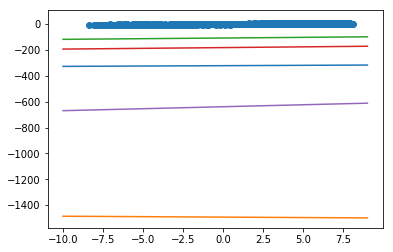

In [14]:
fitBlobs(1)
#bad log loss, no good fits

.Log Loss for group 2 is 0.0009524173760520845
.Log Loss for group 2 is 0.0012707667028767724
.Log Loss for group 2 is 0.0012709540154585205
.Log Loss for group 2 is 0.001321690540815529
.Log Loss for group 2 is 0.0014613270316075834


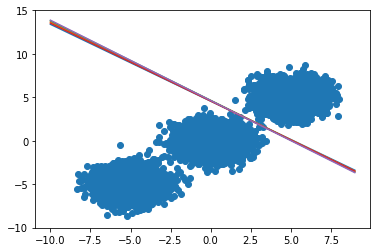

In [15]:
fitBlobs(2)
#good again